### IMPORTANDO BIBLIOTECAS

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras import layers, models
from keras.preprocessing import image
from keras.datasets import cifar10
import joblib

#### FOI UTILIZADO UM DATASET PÚBLICO DE IMAGENS PARA ESTE MODELO, E AQUI FAREMOS A IMPORTAÇÃO, NORMALIZAÇÃO, SEPARAÇÃO DOS DADOS EM TREINO E TESTE, E APÓS, FAREMOS O TESTE DO MODELO E AVALIAÇÃO

Epoch 1/10
1563/1563 [==============================] - 23s 14ms/step - loss: 1.5168 - accuracy: 0.4491 - val_loss: 1.2758 - val_accuracy: 0.5491
Epoch 2/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.1510 - accuracy: 0.5921 - val_loss: 1.0494 - val_accuracy: 0.6357
Epoch 3/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.9938 - accuracy: 0.6512 - val_loss: 0.9763 - val_accuracy: 0.6631
Epoch 4/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.8949 - accuracy: 0.6853 - val_loss: 0.9508 - val_accuracy: 0.6648
Epoch 5/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.8160 - accuracy: 0.7143 - val_loss: 0.9001 - val_accuracy: 0.6906
Epoch 6/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.7566 - accuracy: 0.7331 - val_loss: 0.9113 - val_accuracy: 0.6861
Epoch 7/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.7057 - accuracy: 0.7517 - val_loss: 0.8614 -

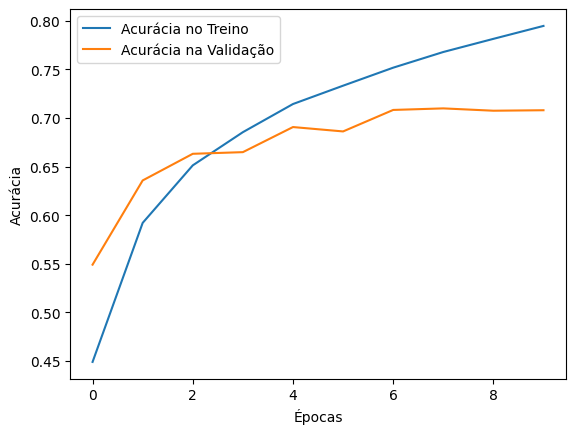

In [2]:
# Carregar e pré-processar o conjunto de dados CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = to_categorical(y_train), to_categorical(y_test)

# Criar uma CNN simples
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compilar o modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Treinar o modelo
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Avaliar o desempenho do modelo
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'\nAcurácia no conjunto de teste: {test_acc}')

# Exibir a curva de aprendizado
plt.plot(history.history['accuracy'], label='Acurácia no Treino')
plt.plot(history.history['val_accuracy'], label='Acurácia na Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.show()


#### AGORA FAREMOS PREDIÇÕES NOVAS, REALIZANDO UM PRÉ-PROCESSAMENTO DA IMAGEM E REALIZANDO A CLASSIFICAÇÃO COM O MODELO TREINADO

1/1 [==============================] - 0s 77ms/step
3: Gato (58.33%)


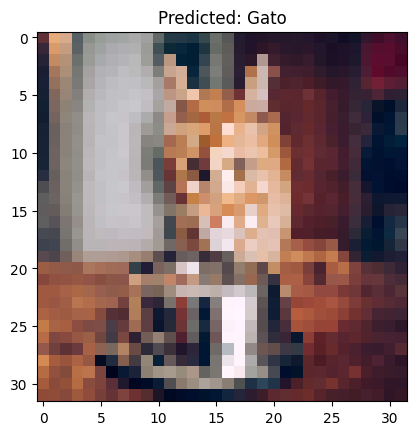

In [5]:
# Carregar e redimensionar a imagem de teste
img_path = r'D:\Python\Treino\ML_Gato.jpg'  # Substitua pelo caminho da sua própria imagem
img = image.load_img(img_path, target_size=(32, 32))  # Redimensiona para o tamanho esperado pelo modelo
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalizar para o intervalo [0, 1]

# Função para decodificar as previsões para o CIFAR-10
def decode_cifar10_predictions(predictions):
    class_names = ['Avião', 'Carro', 'Pássaro', 'Gato', 'Cervo', 'Cachorro', 'Sapo', 'Cavalo', 'Navio', 'Caminhão']
    decoded_predictions = []
    for pred in predictions:
        class_index = np.argmax(pred)
        class_name = class_names[class_index]
        decoded_predictions.append((class_index, class_name, pred[class_index]))
    return decoded_predictions

# Fazer uma previsão
predictions = model.predict(img_array)

# Decodificar as previsões usando a função personalizada
decoded_predictions = decode_cifar10_predictions(predictions)

# Exibir as previsões
for i, (class_index, label, score) in enumerate(decoded_predictions):
    print(f"{class_index}: {label} ({score:.2%})")

# Exibir a imagem
plt.imshow(img)
plt.title(f'Predicted: {decoded_predictions[0][1]}')
plt.show()


#### SALVAR E CARREGAR MODELO

In [ ]:
joblib.dump(model, 'model.pkl')
model = joblib.load('model.pkl')